customers (integer) - monthly demand for a given subcategory of goods

freight_price (float) - freight price of the company goods

fp1, fp2, fp3 (float) - freight price of competitors 1,2,3 goods respectively

product_category_name - (categorical) - broad group category name

product_id (categorical) - detailed group subcategory name

product_description_lenght (integer) - Number of words in the subcategory description

product_score (float) - user rating for subcategories of the company goods

ps1, ps2, ps3 (float) - user rating for subcategories of competitors 1,2,3 respectively

product_photos_qty (integer) - number of photos for each subcategory (product_id)

product_weight_g (integer) - unit weight in grams

total_price (float) - montly revenue which can be calculated using formula:

total_price = unit_price * qty

month_year (string) - data in the format (dd-mm-yyyy) within the range between 01-01-2017 and 01-08-2018. Only months and years are important here.

year (integer) - year which was taken from the 'month_year'

month (integer) - month which was taken from the 'month_year'

qty (integer) - monthly sales per subcategory

unit_price (float) - monthly unit price of subcategory good of company goods

comp_1, comp_2, comp_3 (float) - unit price of within the subcategory of competitors 1,2,3 goods respectively

lag_price (float) - unit price on the previous month

weekend (integer) - number of weekends per month

weekday (integer) - number of weekdays per month

holiday (integer) - number of holidays per month

In [ ]:
import pandas as pd

data = pd.read_csv('retail_price.csv')
print(data.head())

  product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01/05/2017    1        45.95   
1       bed1        bed_bath_table  01/06/2017    3       137.85   
2       bed1        bed_bath_table  01/07/2017    6       275.70   
3       bed1        bed_bath_table  01/08/2017    4       183.80   
4       bed1        bed_bath_table  01/09/2017    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   
3      14.287500       45.95                   39                         161   
4      15.100000       45.95                   39                         161   

   product_photos_qty  ...  comp_1  ps1        fp1      comp_2  ps2  \
0                   2  ...    89.

In [ ]:
data.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [ ]:
print(data.isna().sum())

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64


In [ ]:
print(data.describe())

              qty   total_price  freight_price  unit_price  \
count  676.000000    676.000000     676.000000  676.000000   
mean    14.495562   1422.708728      20.682270  106.496800   
std     15.443421   1700.123100      10.081817   76.182972   
min      1.000000     19.900000       0.000000   19.900000   
25%      4.000000    333.700000      14.761912   53.900000   
50%     10.000000    807.890000      17.518472   89.900000   
75%     18.000000   1887.322500      22.713558  129.990000   
max    122.000000  12095.000000      79.760000  364.000000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count           676.000000                  676.000000          676.000000   
mean             48.720414                  767.399408            1.994083   
std               9.420715                  655.205015            1.420473   
min              29.000000                  100.000000            1.000000   
25%              40.000000                  339.000

In [ ]:
data.nunique()

product_id                     52
product_category_name           9
month_year                     20
qty                            66
total_price                   573
freight_price                 653
unit_price                    280
product_name_lenght            24
product_description_lenght     46
product_photos_qty              7
product_weight_g               45
product_score                  11
customers                      94
weekday                         4
weekend                         3
holiday                         5
month                          12
year                            2
s                             450
volume                         40
comp_1                         88
ps1                             9
fp1                           179
comp_2                        123
ps2                            10
fp2                           242
comp_3                        105
ps3                             9
fp3                           229
lag_price     

**Feature** **Extraction**

<ipython-input-8-06e647b7ba88>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = subset_df.corr()


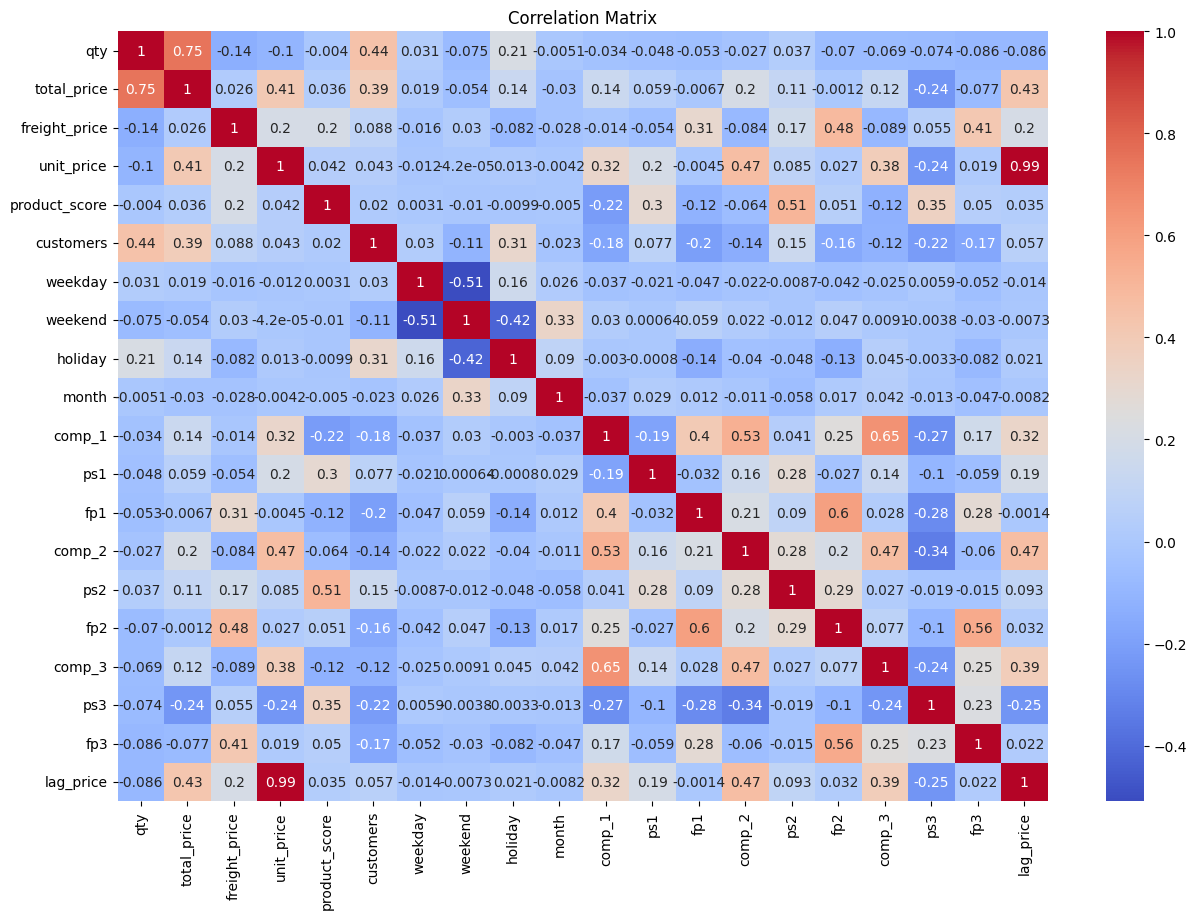

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

subset_cols = ['qty', 'total_price','month_year',  'freight_price', 'unit_price', 'product_score', 'customers', 'weekday', 'weekend', 'holiday',
               'month', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3', 'lag_price']
subset_df = data[subset_cols]
corr_matrix = subset_df.corr()
#--------------------------------

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from scipy.stats import pearsonr
corr1,_ = pearsonr(data['unit_price'], data['comp_1'])
corr2,_ = pearsonr(data['unit_price'], data['weekday'])
corr3,_ = pearsonr(data['unit_price'], data['weekend'])
corr4,_ = pearsonr(data['unit_price'], data['lag_price'])
print(corr1)
print(corr2)
print(corr3)
print(corr4)

0.31711279942436443
-0.011948767757185143
-4.184645866891015e-05
0.9944534285112647


**Splitting Data into train and test model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Define the features and target variable
features = ['comp_1', 'comp_2', 'comp_3', 'lag_price', 'product_score', 'ps1', 'ps2', 'ps3']
target = ['unit_price']

# Split the data into features (X) and target (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)




# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 3.9951396983988188
Root Mean Squared Error: 8.011236869137969
R-squared: 0.9881198773166687


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regression model
model1 = DecisionTreeRegressor()

# Train the model on the training data
model1.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model1.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 3.5738251820955913
Root Mean Squared Error: 8.058473120325495
R-squared: 0.9879793679609198


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regression model
model2 = RandomForestRegressor()

# Train the model on the training data
model2.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model2.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

<ipython-input-13-5e52d4941dc2>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train, y_train)


Mean Absolute Error: 3.0199715047906572
Root Mean Squared Error: 6.747985756072405
R-squared: 0.9915711156630364


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
# Initialize the gradient boosting regression model
model3 = GradientBoostingRegressor()

# Train the model on the training data
model3.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model3.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 3.6455739846834274
Root Mean Squared Error: 7.240264417370246
R-squared: 0.9902964503086321


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Create a scatter plot of the actual prices (y_test) vs. predicted prices (y_pred)
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    marker=dict(size=8, opacity=0.7),
    hovertext=[f'Actual Price: {actual_price}<br>Predicted Price: {predicted_price}'
               for actual_price, predicted_price in zip(y_test, y_pred)],
    hoverinfo='text'
))

fig.add_trace(go.Scatter(
    x=[min(y_test), max(y_test)],
    y=[min(y_test), max(y_test)],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Perfect Prediction'
))

fig.update_layout(
    xaxis_title='Actual Prices',
    yaxis_title='Predicted Prices',
    title='Actual Prices vs. Predicted Prices',
)

fig.show()


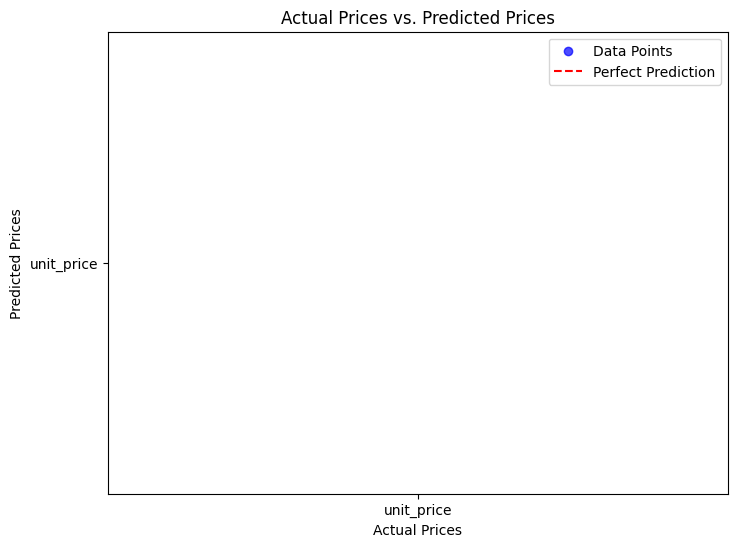

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Create a scatter plot of the actual prices (y_test) vs. predicted prices (y_pred)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.legend()
plt.show()



In [ ]:
# Predict the unit prices for each subcategory
data['predicted_unit_price'] = model3.predict(X)

# Compare the predicted unit price with competitors' prices
data['optimal_price'] = data[['comp_1', 'comp_2', 'comp_3']].min(axis=1)
data['profit_margin'] = data['optimal_price'] - data['predicted_unit_price']

# Display the results
print(data[['product_id', 'comp_1', 'comp_2', 'comp_3', 'predicted_unit_price', 'optimal_price', 'profit_margin']].head(10))

# Visualize the results
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data['predicted_unit_price'],
    y=data['comp_1'],
    mode='markers',
    marker=dict(size=8, opacity=0.7),
    name='Competitor 1'
))

fig.add_trace(go.Scatter(
    x=data['predicted_unit_price'],
    y=data['comp_2'],
    mode='markers',
    marker=dict(size=8, opacity=0.7),
    name='Competitor 2'
))

fig.add_trace(go.Scatter(
    x=data['predicted_unit_price'],
    y=data['comp_3'],
    mode='markers',
    marker=dict(size=8, opacity=0.7),
    name='Competitor 3'
))

fig.add_trace(go.Scatter(
    x=data['predicted_unit_price'],
    y=data['optimal_price'],
    mode='markers',
    marker=dict(size=8, opacity=0.7),
    name='Optimal Price'
))

fig.add_trace(go.Scatter(
    x=[min(data['predicted_unit_price']), max(data['predicted_unit_price'])],
    y=[min(data['predicted_unit_price']), max(data['predicted_unit_price'])],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Perfect Prediction'
))

fig.update_layout(
    xaxis_title='Predicted Unit Price',
    yaxis_title='Unit Price',
    title='Predicted Unit Price vs. Competitors and Optimal Price',
)

fig.show()


  product_id     comp_1      comp_2     comp_3  predicted_unit_price  \
0       bed1  89.900000  215.000000  45.950000             45.871897   
1       bed1  89.900000  209.000000  45.950000             45.871897   
2       bed1  89.900000  205.000000  45.950000             45.871897   
3       bed1  89.900000  199.509804  45.950000             45.871897   
4       bed1  89.900000  163.398710  45.950000             45.801114   
5       bed1  89.900000   45.950000  45.950000             45.846138   
6       bed1  89.900000   40.531818  40.531818             45.846138   
7       bed1  88.488235   39.990000  39.990000             39.829494   
8       bed1  86.900000   39.990000  39.990000             39.829494   
9       bed1  86.900000   39.990000  39.990000             39.829494   

   optimal_price  profit_margin  
0      45.950000       0.078103  
1      45.950000       0.078103  
2      45.950000       0.078103  
3      45.950000       0.078103  
4      45.950000       0.148886  
5  

In [ ]:
# Predict the unit prices for each subcategory
data['predicted_unit_price'] = model3.predict(X)

# Compare the predicted unit price with competitors' prices
data['optimal_price'] = data[['comp_1', 'comp_2', 'comp_3']].min(axis=1)
data['profit_margin'] = data['optimal_price'] - data['predicted_unit_price']

# Display the results
print(data[['product_id', 'comp_1', 'comp_2', 'comp_3', 'predicted_unit_price', 'optimal_price', 'profit_margin']].tail(10))

# Visualize the results
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data['predicted_unit_price'],
    y=data['comp_1'],
    mode='markers',
    marker=dict(size=8, opacity=0.7),
    name='Competitor 1'
))

fig.add_trace(go.Scatter(
    x=data['predicted_unit_price'],
    y=data['comp_2'],
    mode='markers',
    marker=dict(size=8, opacity=0.7),
    name='Competitor 2'
))

fig.add_trace(go.Scatter(
    x=data['predicted_unit_price'],
    y=data['comp_3'],
    mode='markers',
    marker=dict(size=8, opacity=0.7),
    name='Competitor 3'
))

fig.add_trace(go.Scatter(
    x=data['predicted_unit_price'],
    y=data['optimal_price'],
    mode='markers',
    marker=dict(size=8, opacity=0.7),
    name='Optimal Price'
))

fig.add_trace(go.Scatter(
    x=[min(data['predicted_unit_price']), max(data['predicted_unit_price'])],
    y=[min(data['predicted_unit_price']), max(data['predicted_unit_price'])],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Perfect Prediction'
))

fig.update_layout(
    xaxis_title='Predicted Unit Price',
    yaxis_title='Unit Price',
    title='Predicted Unit Price vs. Competitors and Optimal Price',
)

fig.show()

    product_id     comp_1      comp_2  comp_3  predicted_unit_price  \
666       bed4  86.900000   47.900000   39.99             45.846138   
667       bed4  85.045000   47.900000   39.99             47.749895   
668       bed4  83.649615   47.900000   39.99             47.749895   
669       bed4  79.900000   47.900000   39.99             47.749895   
670       bed4  77.933333   47.900000   39.99             47.749895   
671       bed5  89.900000  215.000000   45.95            204.976714   
672       bed5  89.900000  209.000000   45.95            204.976714   
673       bed5  89.900000  205.000000   45.95            204.976714   
674       bed5  89.900000  199.509804   45.95            198.439092   
675       bed5  89.900000  163.398710   45.95            170.962588   

     optimal_price  profit_margin  
666          39.99      -5.856138  
667          39.99      -7.759895  
668          39.99      -7.759895  
669          39.99      -7.759895  
670          39.99      -7.759895  
67